### Understanding Namespace and Classes in Python
                 "Namespaces are one honking great idea - let's do more of those!"
                                                                    --The Zen of Python
Objects are building blocks of python and a namespace is a map to access those blocks. Python has several code block types, each with its own scope, or namespace. This article describes scopes and namespaces for classes. Important concepts about object oriented programming (OOP) and namespaces in python are presented first. Then using those concepts, namespaces and scopes are described in relation to classes and objects in python.

### OOP in Python
Python is a high-level programing language that supports multiple programming paradigms, including functional programming and object oriented programming. Everything in python is an object of a certain class which allows it to support high-order functions. The latter gives python capabilities of functional programming, but behind the scene, even functions are first-class objects in python. For example, python creates a function object func by using the def statement and we can assign attributes to it.

In [1]:
def func():
    pass
print(type(func))
func.at = 20
print(func.at)

<class 'function'>
20


Objects are instances of classes, for example, an integer object is an instance of class Numbers. Classes are “blueprint” for creating objects and provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by their class) for modifying an object’s state. The following code defines a class for a family of circles. This class has three attributes namely, r, Perimeter, and Area. Using circle class we can create a circle with radius r and evaluate its perimeter and area. To understand the use of word self, local variable r inside the Perimeter method, and Perimeter method inside the Area method, we need to understand how the concept of namespace and scope work in python.

In [2]:
class Circle:
    """A class for family of circles"""
    def __init__(self, radius):
        self.r = radius
    def Perimeter (self):
        return 2*self.r*3.14
    def Area (self):
        return self.Perimeter()*self.r/2

C = Circle(1)
print(C.Perimeter())
print(C.Area())

6.28
3.14


### Namespace and Scope in Python
Let’s first see what a name in python is before defining a Namespace. As we have seen earlier everything in python is an object. A name or identifier is simply a name given to the object. Name is a way to access the underlying object. For example, object 10 is referenced with the name ‘t’. Both t and 10 have the same memory address.

In [3]:
t = 10 
print(t)
print(id(t))
print (id(10))
t = t+1
print(id(t))
print(id(11))

10
140707570557616
140707570557616
140707570557648
140707570557648


One important thing to note here is assignments do not copy the data — they just bind the names to objects. So in the above example, t was first bound to 10 and now it is bound to 11 as they both have the same memory address.         
Now, a namespace is a mapping from names to objects, which is implemented as Python dictionaries. The three main examples of namespaces are built-in, global, and local namespaces. The global and local names for a module can be accessed through built-in functions globals() (returns a dictionary) and locals(), respectively.

In [4]:
var = 7
globals()['var']

7

When python interpreter is started, a built-in namespace is created for functions such as abs(), id(), etc. The global namespace is created when a module containing variables, functions, classes, etc. is executed by the interpreter. A local namespace is created for the local names within a function or class. Namespaces are completely independent of each other, two different modules can define the same variable name ‘var’ without confusion. References to names in modules are attribute references. For example, modname.funname — modanme is a module object and funcname is an attribute of it. Consider the case for function func() below, func is attributed to module __main__ , which is the script currently in use.

In [5]:
def func():
    pass
func

<function __main__.func()>

Different namespaces have different lifetimes — the built-in namespaces are created when python interpreter starts and is never deleted. The global namespaces are created when the interpreter reads module definitions and last until the interpreter shuts down. As discussed earlier, the top-level statements in a module have a global namespace (func in the above example) and are considered part of the __main__ module. Similarly, the built-in names live in a built-in module. The local namespaces are created when functions are called and deleted once the function returns or raises an error.       

A scope is the textual portion of a program from where a namespace can be accessed directly without any prefix. The innermost scope containing local names is searched first. After this, the scope of enclosing function nearest to the innermost scope is searched. This scope contains a non-local namespace, but also a non-global namespace. Next to the last scope, the namespace in the current module (__main__) is searched — this is the scope of global namespace. Finally, the outermost scope containing built-in names is searched. The following example explains different scopes in python.

In [6]:
def python_scope(): #has a nonlocal scope
    def local_scope(): #has a local scope
        var = "local variable"
    def nonlocal_scope():
        nonlocal var
        var = "nonlocal variable"
    def global_scope():
        global var
        var = "global variable"
    var = "test variable"
    local_scope()
    print("After local assignment:", var)
    nonlocal_scope()
    print("After nonlocal assignment:", var)
    global_scope()
    print("After global assignment:", var)
python_scope()
print("In global scope:", var) #has a global scope 

After local assignment: test variable
After nonlocal assignment: nonlocal variable
After global assignment: nonlocal variable
In global scope: global variable


In the above example, when python_scope function is called, definitions of the local_scope, nonlocal_scope, and global_scope functions are read. After this, var is assigned with the value “test variable”. Next, when local_scope is executed a local namespace is created for the function. The value “local variable” is bound to this namespace only. This is why the value of var remains “test variable” after the function local_scope is executed. When the variable is declared as nonlocal within the nonlocal_scope function, the name ‘var’ is bound to python_scope function’s namespace and this is why the value of ‘var’ is “nonlocal variable” after nonlocal_scope function is executed. Finally, when ‘var’ is declared as global, it is bound to global (module’s) namespace but we are still in the scope of python_scope function’s namespace. Because of this, the value of variable ‘var’ is still “nonlocal variable”. Once we go outside the scope of python_scope function to global scope the value of ‘var’ becomes “global variable”.      

Therefore, in summary, if a name is declared as global, then all references and assignments to it go to scope containing module __main__/’s names. Similarly, if a name is declared as nonlocal, all references and assignments to it go to namespace immediately outside of the namespace where a variable is declared. If no global or nonlocal statement is in effect, all references and assignments to a name go into the innermost scope.

### Namespace and Scope for Classes
When a class is defined a local namespace is created similar to when a function is defined. As seen earlier, a function (called a method) can be defined within the class. The function has its own namespace, inside the class. The instance objects of the class have their own namespace, independent of the namespace of the class. A Class can inherit parent classes and its namespace is linked to parent classes. Let’s understand the namespace for classes using the example class for a family of circles.   


In the example below, if we use dir() function to check the names in the module’s (__main__) scope, we can see that the name Circle is bound in this scope. We can verify this by printing Circle(), which returns Circle object as an attribute of __main__ module and a memory location.

In [7]:
class Circle:
    rad = "A circle with radius r"
print(dir())
print(Circle())

['C', 'Circle', 'In', 'Out', '_', '_4', '_5', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_ih', '_ii', '_iii', '_oh', 'exit', 'func', 'get_ipython', 'python_scope', 'quit', 't', 'var']


Let’s check the names in the scope of class Circle using __dict__ function.

In [8]:
print(Circle.__dict__)
print(Circle.rad)

{'__module__': '__main__', 'rad': 'A circle with radius r', '__dict__': <attribute '__dict__' of 'Circle' objects>, '__weakref__': <attribute '__weakref__' of 'Circle' objects>, '__doc__': None}
A circle with radius r


We can see here that the variable ‘rad’ is in the scope of class Circle and bound to Circle object. Also, each instance of the class has different namespaces. In the code below, two instances of Circle class, C1 and C2 are created and assigned with an attribute scope. When the dictionary containing names in the scope of C1 and C2 is printed, we can see that they both have different scopes.

In [9]:
C1 = Circle()
C2 = Circle()
C1.scope = 'this is in the scope of C1'
C2.scope = 'this is in the scope of C2'
print(C1.__dict__)
print(C2.__dict__)

{'scope': 'this is in the scope of C1'}
{'scope': 'this is in the scope of C2'}


Finally, let’s understand the scope and namespace for methods within the class. Each method inside the class has its own namespace. In the code below, Perimeter() is a function within the class. When this function is executed, it raises a Name error. This is because Perimeter() is attributed to the scope of Circle, while we are trying to access it in the global (module’s) scope.

In [10]:
class Circle:
    rad = "A circle with radius r"
    def Perimeter(r):
        print(f'value of perimeter is {2*3.14*r}')
Perimeter(5)

NameError: name 'Perimeter' is not defined

When we associate class_func with the class Circle namespace it doesn't give any error as shown below.

In [11]:
Circle.Perimeter(1)

value of perimeter is 6.28


Okay, but the purpose of a function within a class is to update or give the properties of class objects. Let’s call this function for an object (instance) of the Circle class.

In [12]:
Circle().Perimeter(1)

TypeError: Perimeter() takes 1 positional argument but 2 were given

The code above raises a type error, this is because when we attribute a function to an object, the object is automatically passed as a parameter to the function. Therefore, we have to pass an object(instance) of class in the definition of the function. This is where self is used. ‘Self’ is just a name given to an object of the class and this name is bound with the namespace of the object.

In [13]:
class Circle:
    rad = "A circle with radius r"
    def Perimeter(self, r):
        print(f'value of perimeter is {2*3.14*r}')
Circle().Perimeter(1)

value of perimeter is 6.28


When we create objects using classes, they are generally created with some initial states. Here, the built-in __init__ method can be used to define an initial state. For example, we can define a circle with a given radius ‘r’. Also, you don’t have to call __init__ method explicitly. It is called automatically when an instance of the class is created. See the example below.

In [14]:
class Circle:
    """A class for family of circles"""
    def __init__(self, radius):
        self.r = radius
        
Circle(1)

Also, note that here self.r is used to bound name ‘r’ with the object’s namespace. So that it will be available to be accessed in the scope of object’s namespace using (Circle().r). And using the same terminology, a method in a class can access another method in the class as illustrated in the example below.

In [15]:
class Circle:
    """A class for family of circles"""
    def __init__(self, radius):
        self.r = radius
    def Perimeter (self):
        return 2*self.r*3.14
    def Area (self):
        return self.Perimeter()*self.r/2
C = Circle(1)
print(C.Perimeter())
print(C.Area())

6.28
3.14


In the above example method Perimeter() is used in the Area() method. Again ‘self’ is used with Perimeter() method to bound it with the object ‘self’s’ namespace.

In summary, the concept of namespace and scope for the Circle class is illustrated using the figure below. First, definitions of class Circle located in the global namespace are read and a namespace for Circle class is created. Namespaces for the object (C), and methods (Perimeter, Area) are also created. When we execute method Area using C.Area(), first the names in the scope of method (Area) are searched and then in the scope of object C, and finally in the scope of the class Circle. For example, the word Perimeter is first searched in the scope of the Area method, then in the scope of object (C/self). The name Perimeter is bound in the object’s namespace using self.Perimeter, therefore, can be used within the Area method. If we use Perimeter without the self word, it won’t be bounded in object’s scope and would not be accessible for Area method.          


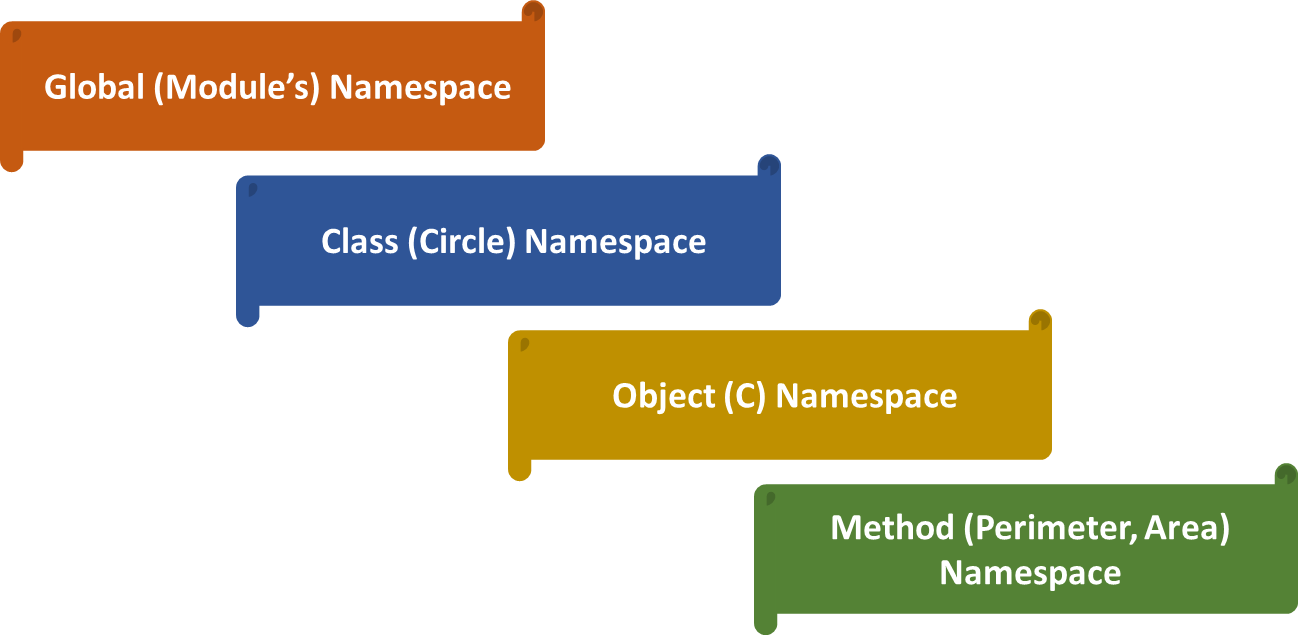       

Different Namespaces for Class Circle


